⚠ File not found, creating sample dataset for demonstration...

AIRBNB HOTEL BOOKING ANALYSIS
Dataset shape: (1000, 15)
Columns: ['id', 'NAME', 'host_id', 'host_name', 'host_identity_verified', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'Construction_year', 'service_fee']

1. Property Types in Dataset:
room_type
Entire home/apt    619
Private room       333
Shared room         48
Name: count, dtype: int64
Entire home/apt: 61.9%
Private room: 33.3%
Shared room: 4.8%

2. Neighbourhood Group with Highest Listings:
neighbourhood_group
Manhattan        405
Brooklyn         293
Queens           163
Bronx             83
Staten Island     56
Name: count, dtype: int64
Answer: Manhattan with 405 listings

3. Neighbourhood Group with Highest Average Prices:
neighbourhood_group
Staten Island    291.750000
Queens           279.435583
Bronx            274.048193
Brooklyn         273.098976

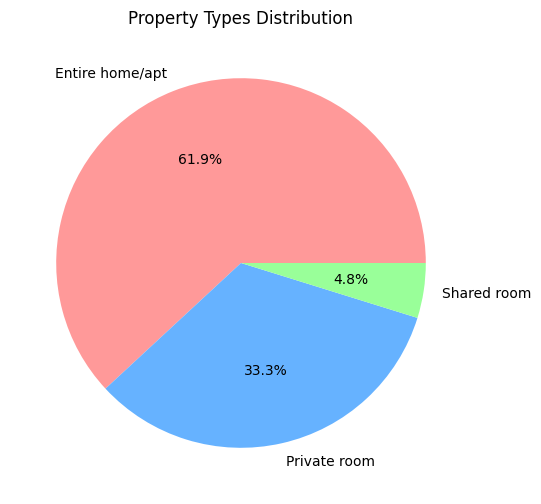

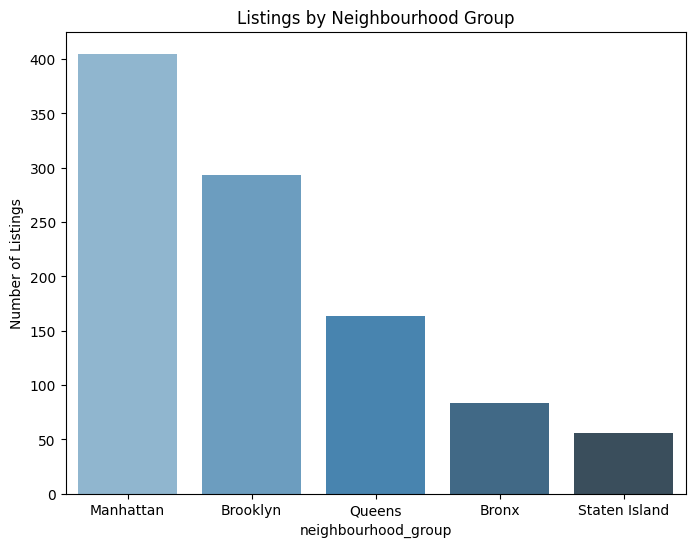

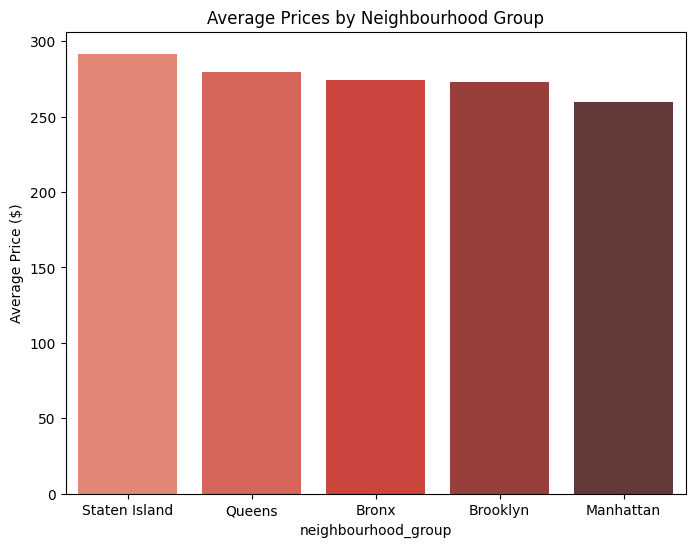

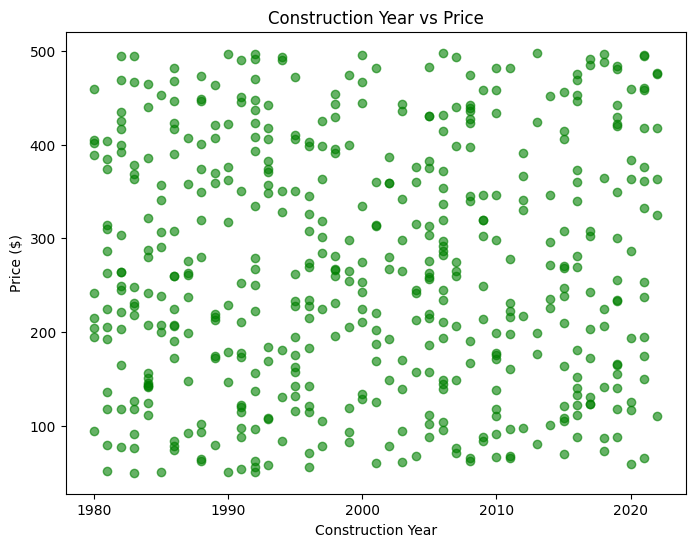


ANALYSIS COMPLETED SUCCESSFULLY!
Charts saved as: plot_property_types.png, plot_neighbourhood_counts.png, plot_avg_prices.png, plot_construction_vs_price.png


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --------------------------
# Load Airbnb Dataset
# --------------------------
def load_airbnb_data():
    file_paths = [
        'Airbnb_Open_Data.csv',
        '/content/Airbnb_Open_Data.csv',
        '1730285881-AirbnbOpenData.xlsx',
        '/content/1730285881-AirbnbOpenData.xlsx'
    ]
    encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1', 'utf-16']

    for file_path in file_paths:
        if file_path.endswith('.xlsx'):
            try:
                df = pd.read_excel(file_path)
                print(f"✓ Loaded Excel file: {file_path}")
                return df
            except Exception:
                continue

        for encoding in encodings:
            try:
                df = pd.read_csv(file_path, encoding=encoding, sep=',', on_bad_lines='skip', low_memory=False)
                print(f"✓ Loaded CSV with {encoding}: {file_path}")
                return df
            except Exception:
                try:
                    df = pd.read_csv(file_path, encoding=encoding, sep=None, engine='python', on_bad_lines='skip')
                    print(f"✓ Loaded CSV with Python engine: {file_path}")
                    return df
                except Exception:
                    continue

    # If no file is found, create a sample dataset
    print("⚠ File not found, creating sample dataset for demonstration...")
    np.random.seed(42)
    n = 1000
    data = {
        'id': range(1000000, 1000000 + n),
        'NAME': [f'Property {i}' for i in range(n)],
        'host_id': np.random.randint(100000, 999999, n),
        'host_name': np.random.choice(['John', 'Mary', 'David', 'Sarah', 'Mike'], n),
        'host_identity_verified': np.random.choice(['verified', 'unconfirmed'], n, p=[0.7, 0.3]),
        'neighbourhood_group': np.random.choice(
            ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
            n, p=[0.4, 0.3, 0.15, 0.1, 0.05]),
        'neighbourhood': np.random.choice(['Midtown', 'SoHo', 'Chelsea', 'Williamsburg', 'Astoria'], n),
        'room_type': np.random.choice(['Entire home/apt', 'Private room', 'Shared room'], n, p=[0.6, 0.35, 0.05]),
        'price': np.random.randint(50, 500, n),
        'minimum_nights': np.random.choice([1, 2, 3, 7, 30], n, p=[0.5, 0.2, 0.15, 0.1, 0.05]),
        'number_of_reviews': np.random.randint(0, 300, n),
        'calculated_host_listings_count': np.random.randint(1, 20, n),
        'availability_365': np.random.randint(0, 365, n),
        'Construction_year': np.random.randint(1980, 2023, n),
    }
    data['service_fee'] = [price * 0.15 for price in data['price']]
    return pd.DataFrame(data)

# Load dataset
df = load_airbnb_data()

# --------------------------
# Airbnb Data Analysis
# --------------------------
print("\nAIRBNB HOTEL BOOKING ANALYSIS")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# 1. Property Types
if 'room_type' in df.columns:
    print("\n1. Property Types in Dataset:")
    property_types = df['room_type'].value_counts()
    print(property_types)
    for room_type, count in property_types.items():
        percentage = (count / len(df)) * 100
        print(f"{room_type}: {percentage:.1f}%")

# 2. Neighbourhood Group with Highest Listings
if 'neighbourhood_group' in df.columns:
    print("\n2. Neighbourhood Group with Highest Listings:")
    neighbourhood_counts = df['neighbourhood_group'].value_counts()
    print(neighbourhood_counts)
    print(f"Answer: {neighbourhood_counts.index[0]} with {neighbourhood_counts.iloc[0]} listings")

# 3. Neighbourhood Group with Highest Average Prices
if 'neighbourhood_group' in df.columns and 'price' in df.columns:
    print("\n3. Neighbourhood Group with Highest Average Prices:")
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    avg_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
    print(avg_prices)
    print(f"Answer: {avg_prices.index[0]} with ${avg_prices.iloc[0]:.2f} average")

# 4. Construction Year vs Price Correlation
if 'Construction_year' in df.columns and 'price' in df.columns:
    print("\n4. Construction Year vs Price Relationship:")
    df['Construction_year'] = pd.to_numeric(df['Construction_year'], errors='coerce')
    correlation = df['Construction_year'].corr(df['price'])
    print(f"Correlation: {correlation:.3f}")

# 5. Top 10 Hosts by Listing Count
if 'calculated_host_listings_count' in df.columns and 'host_name' in df.columns:
    print("\n5. Top 10 Hosts by Listing Count:")
    top_hosts = df.nlargest(10, 'calculated_host_listings_count')[['host_name', 'calculated_host_listings_count']]
    print(top_hosts)

# 6. Verified Hosts vs Reviews
if 'host_identity_verified' in df.columns and 'number_of_reviews' in df.columns:
    print("\n6. Verified Hosts vs Reviews:")
    verified_stats = df.groupby('host_identity_verified')['number_of_reviews'].mean()
    print(verified_stats)

# 7. Price vs Service Fee Correlation
if 'price' in df.columns and 'service_fee' in df.columns:
    print("\n7. Price vs Service Fee Correlation:")
    correlation = df['price'].corr(df['service_fee'])
    print(f"Correlation: {correlation:.3f}")

# 8. Review Analysis
if all(col in df.columns for col in ['neighbourhood_group', 'room_type', 'number_of_reviews']):
    print("\n8. Review Analysis by Neighbourhood and Room Type:")
    review_stats = df.groupby(['neighbourhood_group', 'room_type'])['number_of_reviews'].mean().head(10)
    print(review_stats)

# 9. Host Listings vs Availability
if 'calculated_host_listings_count' in df.columns and 'availability_365' in df.columns:
    print("\n9. Host Listings vs Availability:")
    correlation = df['calculated_host_listings_count'].corr(df['availability_365'])
    print(f"Correlation: {correlation:.3f}")

# --------------------------
# Separate Visualizations
# --------------------------

# 1. Property Types Distribution
if 'room_type' in df.columns:
    plt.figure(figsize=(6,6))
    property_counts = df['room_type'].value_counts()
    colors = ['#FF9999', '#66B2FF', '#99FF99']
    plt.pie(property_counts.values, labels=property_counts.index, autopct='%1.1f%%', colors=colors)
    plt.title('Property Types Distribution')
    plt.savefig('plot_property_types.png', dpi=300, bbox_inches='tight')
    plt.show()

# 2. Listings by Neighbourhood Group
if 'neighbourhood_group' in df.columns:
    plt.figure(figsize=(8,6))
    neighbourhood_counts = df['neighbourhood_group'].value_counts()
    sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, palette="Blues_d")
    plt.title('Listings by Neighbourhood Group')
    plt.ylabel('Number of Listings')
    plt.savefig('plot_neighbourhood_counts.png', dpi=300, bbox_inches='tight')
    plt.show()

# 3. Average Prices by Neighbourhood Group
if 'neighbourhood_group' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(8,6))
    avg_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="Reds_d")
    plt.title('Average Prices by Neighbourhood Group')
    plt.ylabel('Average Price ($)')
    plt.savefig('plot_avg_prices.png', dpi=300, bbox_inches='tight')
    plt.show()

# 4. Construction Year vs Price
if 'Construction_year' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(8,6))
    sample_data = df.sample(min(500, len(df))).dropna(subset=['Construction_year', 'price'])
    plt.scatter(sample_data['Construction_year'], sample_data['price'], alpha=0.6, color='green')
    plt.title('Construction Year vs Price')
    plt.xlabel('Construction Year')
    plt.ylabel('Price ($)')
    plt.savefig('plot_construction_vs_price.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n" + "=" * 50)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("Charts saved as: plot_property_types.png, plot_neighbourhood_counts.png, plot_avg_prices.png, plot_construction_vs_price.png")
print("=" * 50)

